In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

### Data visualization

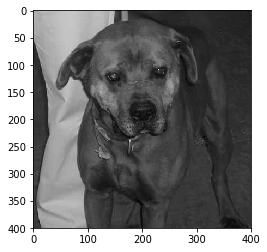

In [5]:
path = os.getcwd()
DATADIR = os.path.join(path,'PetImages/Training')

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [6]:
img_array.shape

(400, 400)

### Making training images smaller in size

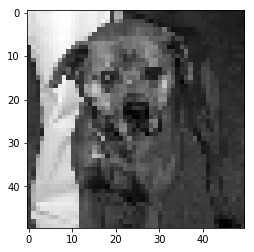

In [7]:
# We definitely don't want the images that big,
# but also various images are different shapes, and this is also a problem.
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

### Creation of a training dataset: categorizing and labeling

training_data = [X, y], where X - image data, y - label 0 or 1 for Cat or Dog

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
#             except OSError as e:
#                print("OSErrroBad img most likely", e, os.path.join(path,img))
#             except Exception as e:
#                print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12485/12485 [01:43<00:00, 121.06it/s]

24914


### Data shuffling

One thing we want to do is make sure our data is balanced.
In the case of this dataset, I can see that the dataset started off as being balanced.
By balanced, I mean there are the same number of examples for each class (same number of dogs and cats).
If not balanced, you either want to pass the class weights to the model,
so that it can measure error appropriately,
or balance your samples by trimming the larger set to be the same size as the smaller set.
If you do not balance, the model will initially learn that the best thing to do is predict only one class,
whichever is the most common. Then, it will often get stuck here.
In our case though, this data is already balanced, so that's easy enough.
Maybe later we'll have a dataset that isn't balanced so nicely.
Also, if you have a dataset that is too large to fit into your ram, you can batch-load in your data.
There are many ways to do this, some outside of TensorFlow and some built in.
We may discuss this further, but, for now, we're mainly trying to cover how your data should look,
be shaped, and fed into the models.

Next, we want to shuffle the data. Right now our data is just all dogs, then all cats.
This will usually wind up causing trouble too, as, initially,
the classifier will learn to just predict dogs always.
Then it will shift to oh, just predict all cats! Going back and forth like this is no good either.

In [9]:
import random

random.shuffle(training_data)

### 0 - Dog,

### 1 - Cat.

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
0
1
0
1
0
1


Great, we've got the classes nicely mixed in! Time to make our model!

In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)) # 1-for grayscale images, (it would be 3 for colored, RGB)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Let's save this data, so that we don't need to keep calculating it every time we want to play with the neural network model:

In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

We can always load it in to our current script, or a totally new one by doing:

In [13]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)